# Breast Cancer Wisconsin : Predict whether the cancer is benign or malignant

In [79]:
#Step 1 : Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 2: Load dataset
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# Step 3: Initial Exploration :
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Step 4 : Data Preprocessing
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Since the 'Unnamed' column has no values, we need to drop it. Additionally, we should ensure there is a unique identifier in the dataset.

In [6]:
# 1.Drop unuseful coloumns  from dataset
df.drop(columns=['Unnamed: 32', 'id'],inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# Convert target column 'diagnosis' to binary (M=1, B=0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

In [8]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
#Checking the dataset is Imbalanced 
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

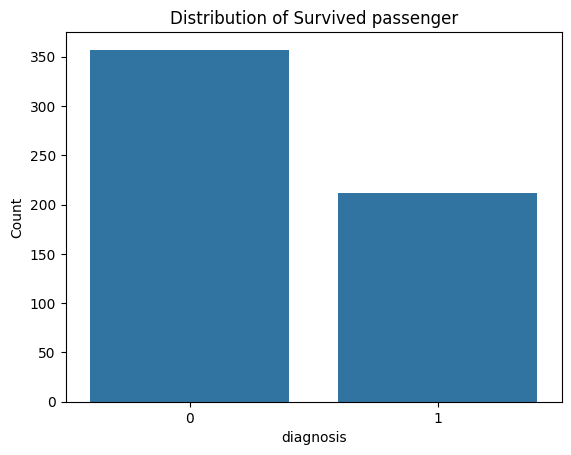

In [10]:
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Survived passenger')
plt.xlabel('diagnosis')
plt.ylabel('Count')

plt.show()

# Imbalanced Dataset

In [11]:
# Features and target
X = df.drop("diagnosis", axis=1)
Y = df["diagnosis"]

In [12]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X,Y)

In [13]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,...,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,...,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,...,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,...,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,...,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,13.287132,18.589573,88.083445,546.386225,0.121965,0.158420,0.168864,0.087282,0.204166,0.074678,...,16.371080,26.834415,110.614527,837.705776,0.168609,0.395058,0.560028,0.202570,0.341453,0.122420
710,17.614669,23.789633,118.833750,980.607574,0.093582,0.193652,0.209317,0.098511,0.169766,0.072269,...,21.566088,29.815671,143.776030,1437.000000,0.122597,0.468496,0.528568,0.199346,0.236662,0.119305
711,22.769487,25.382257,153.815219,1623.019830,0.113167,0.180569,0.319685,0.155050,0.205739,0.060467,...,25.219289,30.790507,173.720467,1998.335859,0.149809,0.354900,0.675319,0.257745,0.285560,0.082665
712,15.442574,19.494522,101.544508,747.461248,0.108965,0.121176,0.144977,0.080238,0.192329,0.057988,...,19.255755,26.109023,124.866489,1155.597864,0.154417,0.238232,0.377141,0.151612,0.284129,0.080234


In [14]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
709    1
710    1
711    1
712    1
713    1
Name: diagnosis, Length: 714, dtype: int64

In [15]:
df1_ = pd.DataFrame(X,columns = X.columns)
df2_ = pd.DataFrame(Y, columns = ['diagnosis'])

In [16]:
df1_

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,...,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,...,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,...,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,...,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,...,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,13.287132,18.589573,88.083445,546.386225,0.121965,0.158420,0.168864,0.087282,0.204166,0.074678,...,16.371080,26.834415,110.614527,837.705776,0.168609,0.395058,0.560028,0.202570,0.341453,0.122420
710,17.614669,23.789633,118.833750,980.607574,0.093582,0.193652,0.209317,0.098511,0.169766,0.072269,...,21.566088,29.815671,143.776030,1437.000000,0.122597,0.468496,0.528568,0.199346,0.236662,0.119305
711,22.769487,25.382257,153.815219,1623.019830,0.113167,0.180569,0.319685,0.155050,0.205739,0.060467,...,25.219289,30.790507,173.720467,1998.335859,0.149809,0.354900,0.675319,0.257745,0.285560,0.082665
712,15.442574,19.494522,101.544508,747.461248,0.108965,0.121176,0.144977,0.080238,0.192329,0.057988,...,19.255755,26.109023,124.866489,1155.597864,0.154417,0.238232,0.377141,0.151612,0.284129,0.080234


In [17]:
df2_

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
709,1
710,1
711,1
712,1


In [18]:
after_smote_df = pd.concat([df1_, df2_], axis=1)

In [19]:
print("INITIAL DATA SHAPE : ", df.shape)
print("AFTER SMOTE SHAPE : ", after_smote_df.shape)
# Now the data is balanced..we are keeping the original data as we will se the model performace with raw data as well.

INITIAL DATA SHAPE :  (569, 31)
AFTER SMOTE SHAPE :  (714, 31)


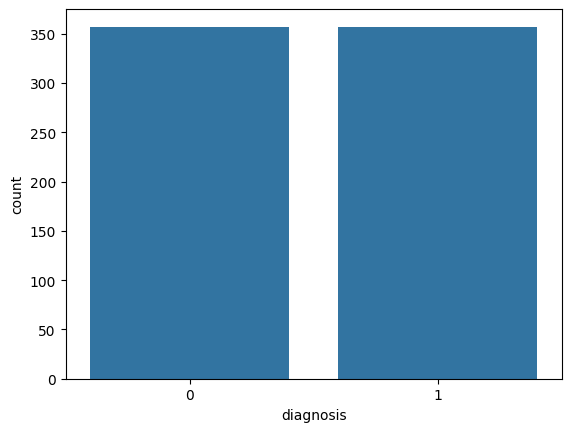

In [20]:
sns.countplot(x= 'diagnosis',data = after_smote_df)
plt.show()

In [21]:
new_samples = pd.DataFrame(X[len(df):])
print("Newly generated samples: \n", new_samples)

Newly generated samples: 
      radius_mean  texture_mean  perimeter_mean    area_mean  smoothness_mean  \
569    18.977086     18.824237      123.419640  1133.941011         0.083985   
570    20.527607     28.763336      138.302652  1270.741528         0.113357   
571    20.526123     28.751722      138.265814  1270.859205         0.113265   
572    19.115218     25.709338      127.244911  1121.082389         0.096432   
573    13.414880     20.534880       88.714881   557.717609         0.110998   
..           ...           ...             ...          ...              ...   
709    13.287132     18.589573       88.083445   546.386225         0.121965   
710    17.614669     23.789633      118.833750   980.607574         0.093582   
711    22.769487     25.382257      153.815219  1623.019830         0.113167   
712    15.442574     19.494522      101.544508   747.461248         0.108965   
713    24.894766     23.085381      168.192533  1857.603954         0.104481   

     compact

In [22]:
# Creating a copy of smote_df
fdf = after_smote_df

In [23]:
fdf.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [24]:
for i, col in enumerate(fdf.columns):
    print(i, col)

0 radius_mean
1 texture_mean
2 perimeter_mean
3 area_mean
4 smoothness_mean
5 compactness_mean
6 concavity_mean
7 concave points_mean
8 symmetry_mean
9 fractal_dimension_mean
10 radius_se
11 texture_se
12 perimeter_se
13 area_se
14 smoothness_se
15 compactness_se
16 concavity_se
17 concave points_se
18 symmetry_se
19 fractal_dimension_se
20 radius_worst
21 texture_worst
22 perimeter_worst
23 area_worst
24 smoothness_worst
25 compactness_worst
26 concavity_worst
27 concave points_worst
28 symmetry_worst
29 fractal_dimension_worst
30 diagnosis


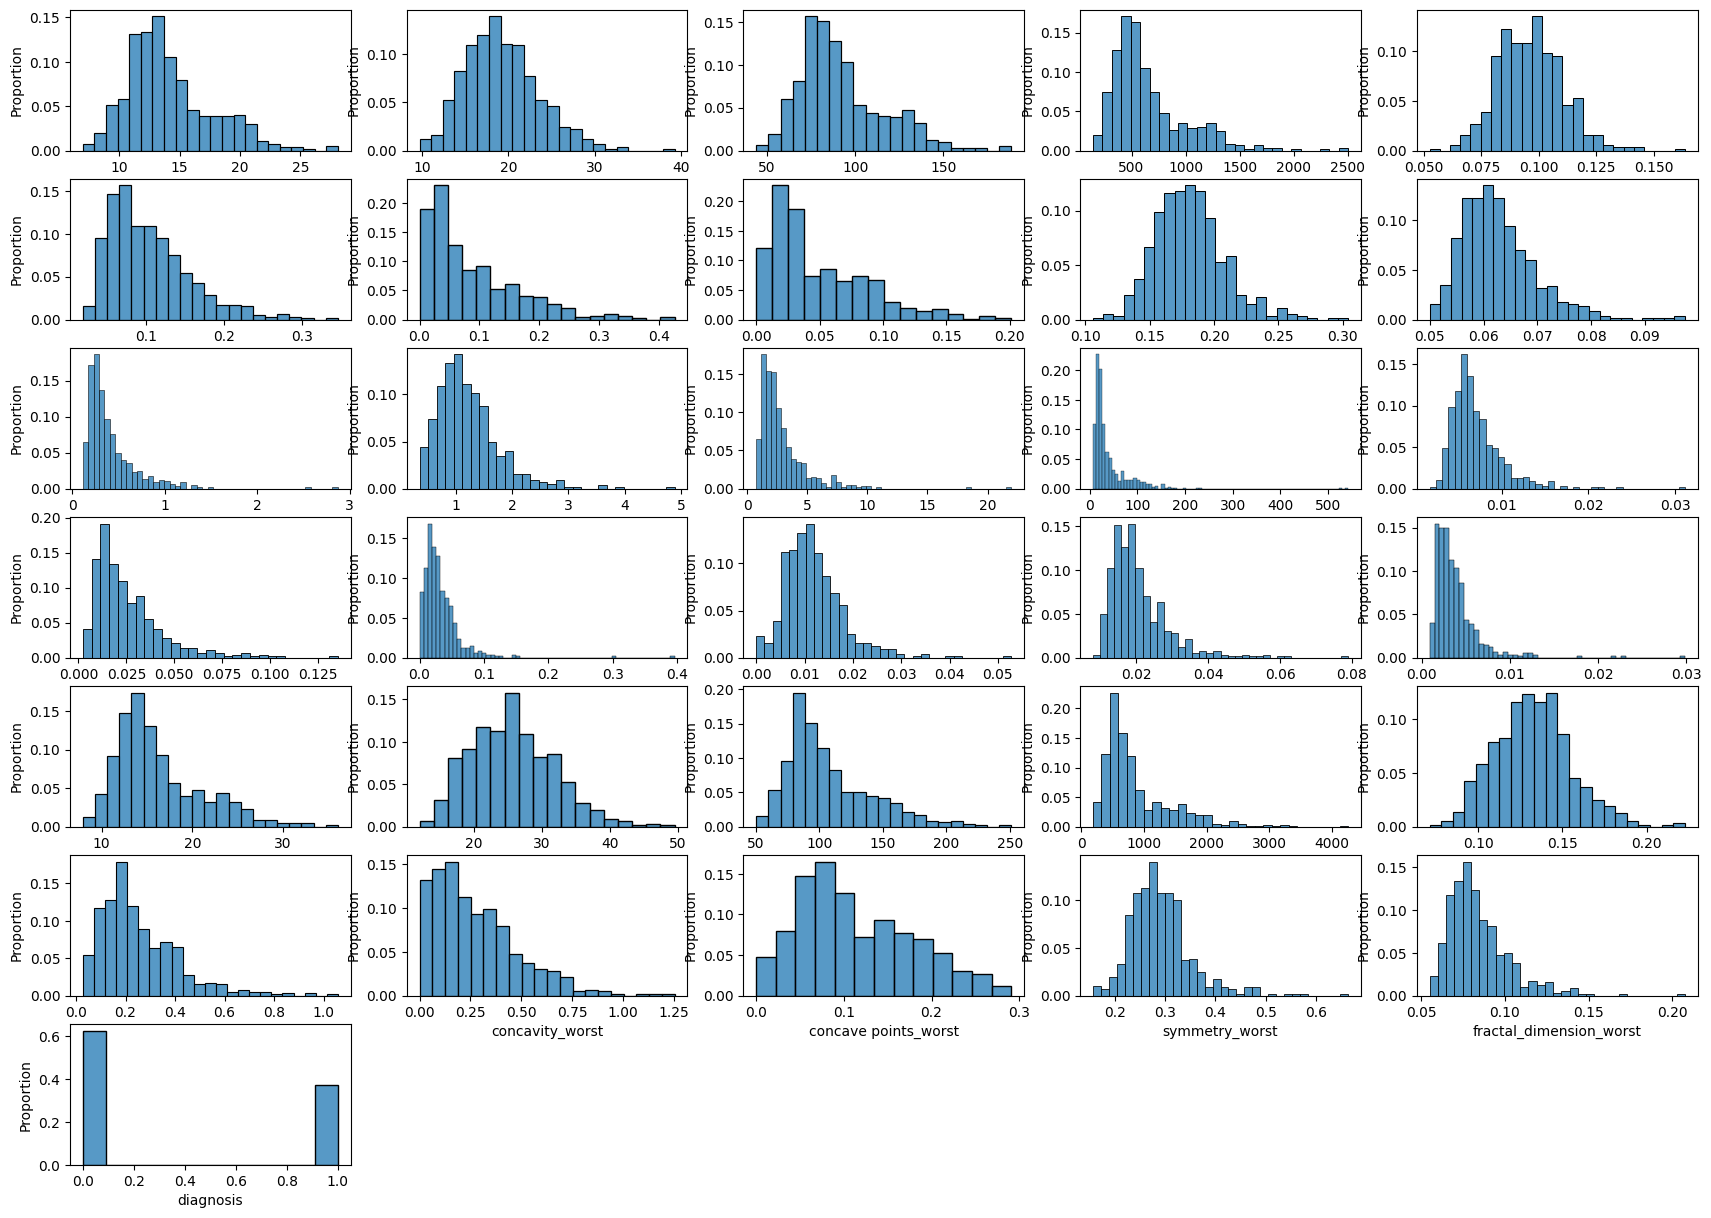

In [25]:
plt.figure(figsize=(21,15))

plt.subplot2grid((7,5), (0,0))
sns.histplot(df.radius_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (0,1))
sns.histplot(df.texture_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (0,2))
sns.histplot(df.perimeter_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (0,3))
sns.histplot(df.area_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (0,4))
sns.histplot(df.smoothness_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (1,0))
sns.histplot(df.compactness_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (1,1))
sns.histplot(df.concavity_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (1,2))
sns.histplot(df['concave points_mean'].sort_values(), stat='proportion')

plt.subplot2grid((7,5), (1,3))
sns.histplot(df.symmetry_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (1,4))
sns.histplot(df.fractal_dimension_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (2,0))
sns.histplot(df.radius_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (2,1))
sns.histplot(df.texture_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (2,2))
sns.histplot(df.perimeter_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (2,3))
sns.histplot(df.area_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (2,4))
sns.histplot(df.smoothness_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (3,0))
sns.histplot(df.compactness_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (3,1))
sns.histplot(df.concavity_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (3,2))
sns.histplot(df['concave points_se'].sort_values(), stat='proportion')

plt.subplot2grid((7,5), (3,3))
sns.histplot(df.symmetry_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (3,4))
sns.histplot(df.fractal_dimension_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (4,0))
sns.histplot(df.radius_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (4,1))
sns.histplot(df.texture_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (4,2))
sns.histplot(df.perimeter_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (4,3))
sns.histplot(df.area_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (4,4))
sns.histplot(df.smoothness_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (5,0))
sns.histplot(df.compactness_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (5,1))
sns.histplot(df.concavity_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (5,2))
sns.histplot(df['concave points_worst'].sort_values(), stat='proportion')

plt.subplot2grid((7,5), (5,3))
sns.histplot(df.symmetry_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (5,4))
sns.histplot(df.fractal_dimension_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (6,0))
sns.histplot(df.diagnosis.sort_values(), stat='proportion')

plt.show()

In [26]:
# first viaulize the outliers
def show_boxplots(df:pd.DataFrame):
    fig, axs = plt.subplots(10, 3, figsize = (15, 12))
    
    for i, column in enumerate(df.columns[:-1]):
        row_index = i // 3
        col_index = i % 3
        sns.boxplot(y=column, data=df, ax=axs[row_index, col_index])
        axs[row_index, col_index].set_title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

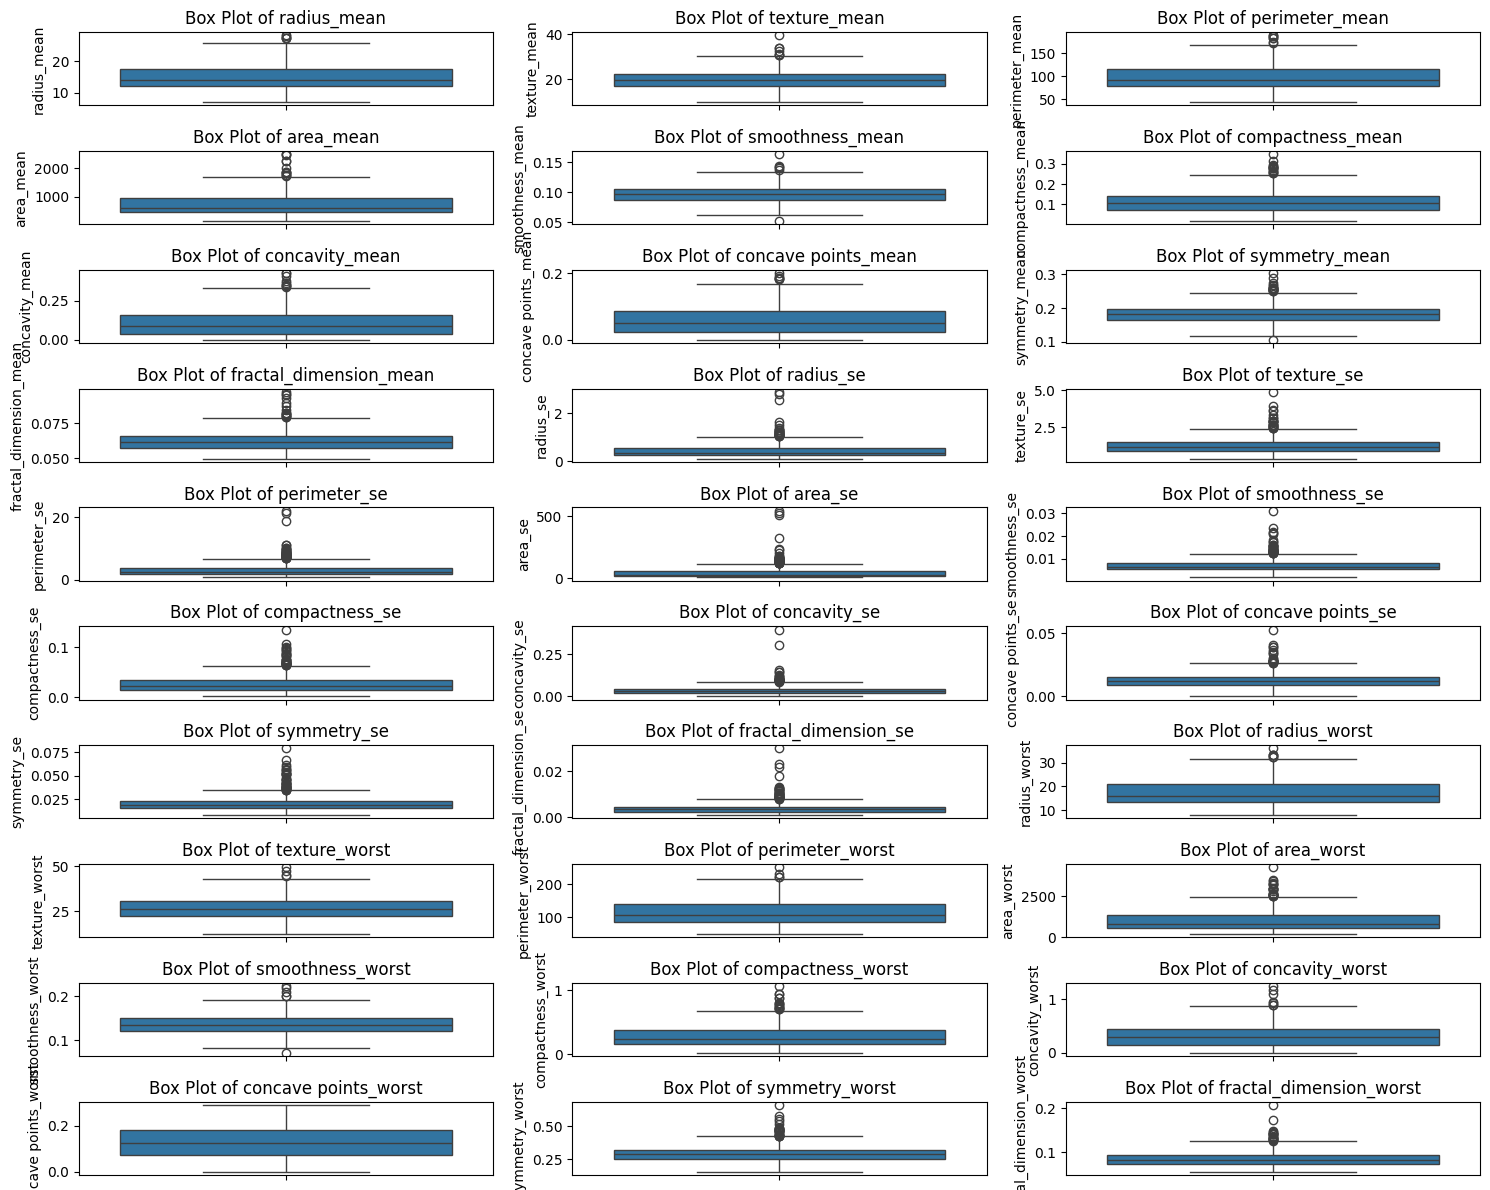

In [27]:
show_boxplots(fdf)

In [28]:
def get_iqr_thresholds(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_fence = q1 - 1.5 * IQR
    upper_fence = q3 + 1.5 * IQR
    return lower_fence, upper_fence

In [29]:
def get_outliers_count(df: pd.DataFrame):
#     desc_df = fdf.describe()
    outliers_count = {}

    for column in df.columns[:-1]:
        lower_fence, upper_fence = get_iqr_thresholds(df,column)

        # Count outliers in the column
        outlier_count = df[(df[column] < lower_fence) | (df[column] > upper_fence)][column].count()

        outliers_count[column] = outlier_count
         
        
    return outliers_count

In [30]:
outliers = get_outliers_count(fdf)
outliers
# You can verify these in the plot as well

{'radius_mean': 5,
 'texture_mean': 7,
 'perimeter_mean': 7,
 'area_mean': 13,
 'smoothness_mean': 6,
 'compactness_mean': 14,
 'concavity_mean': 9,
 'concave points_mean': 6,
 'symmetry_mean': 17,
 'fractal_dimension_mean': 15,
 'radius_se': 27,
 'texture_se': 23,
 'perimeter_se': 47,
 'area_se': 41,
 'smoothness_se': 35,
 'compactness_se': 31,
 'concavity_se': 27,
 'concave points_se': 21,
 'symmetry_se': 38,
 'fractal_dimension_se': 36,
 'radius_worst': 6,
 'texture_worst': 4,
 'perimeter_worst': 4,
 'area_worst': 22,
 'smoothness_worst': 6,
 'compactness_worst': 15,
 'concavity_worst': 7,
 'concave points_worst': 0,
 'symmetry_worst': 25,
 'fractal_dimension_worst': 19}

In [31]:
fdf.shape

(714, 31)

In [32]:
# Replacing with median as outliers are in numerical features
def impute_outliers_with_median(df: pd.DataFrame, outliers_count_dict: dict):
    for column, outlier_count in outliers_count_dict.items():
        if outlier_count > 2:
            lower_fence, upper_fence = get_iqr_thresholds(df,column)
            # Impute outliers with median
            median_value = df[column].median()
            
            # Replace outliers in the entire DataFrame with median for the specified column
            df[column] = np.where((df[column] < lower_fence) | (df[column] > upper_fence), median_value, df[column])

    return df

In [33]:
fdf = impute_outliers_with_median(fdf, outliers)

In [34]:
get_outliers_count(fdf)

{'radius_mean': 1,
 'texture_mean': 0,
 'perimeter_mean': 0,
 'area_mean': 7,
 'smoothness_mean': 1,
 'compactness_mean': 10,
 'concavity_mean': 2,
 'concave points_mean': 0,
 'symmetry_mean': 1,
 'fractal_dimension_mean': 5,
 'radius_se': 23,
 'texture_se': 8,
 'perimeter_se': 19,
 'area_se': 50,
 'smoothness_se': 13,
 'compactness_se': 14,
 'concavity_se': 11,
 'concave points_se': 8,
 'symmetry_se': 22,
 'fractal_dimension_se': 12,
 'radius_worst': 1,
 'texture_worst': 0,
 'perimeter_worst': 0,
 'area_worst': 8,
 'smoothness_worst': 1,
 'compactness_worst': 6,
 'concavity_worst': 2,
 'concave points_worst': 0,
 'symmetry_worst': 10,
 'fractal_dimension_worst': 10}

In [35]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [36]:
# For printing the outliers
outl = find_outliers_IQR(fdf["area_se"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 50
max outlier value: 116.4
min outlier value: 92.81


2       94.030000
4       94.440000
12     116.200000
18     112.400000
23      93.990000
24     102.600000
25     111.400000
27      93.540000
30     105.000000
38     106.000000
42     104.900000
53      98.810000
56     102.500000
70      96.050000
78     116.400000
138    101.900000
156     93.910000
162     97.070000
164     97.850000
210    111.700000
219    109.900000
252     92.810000
256    106.400000
366    103.600000
433    103.900000
460    115.200000
468    104.900000
498     95.770000
533    100.400000
565     99.040000
579     96.335578
583     95.207531
587    112.574845
601    101.426407
613    112.362620
628     99.720981
638    102.111098
641    101.610511
642    109.427290
654    103.914875
666     93.020677
668     99.153514
669     99.455512
672     95.551767
686     99.722940
687    104.695254
694    115.658121
697     97.680263
710     98.939440
711    105.888068
Name: area_se, dtype: float64

In [37]:
fdf = fdf.drop(outl.index)

In [38]:
# For printing the outliers
outl = find_outliers_IQR(fdf["perimeter_se"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 16
max outlier value: 6.716408137144599
min outlier value: 5.627351760339802


77     6.311000
83     5.801000
180    5.820000
218    6.487000
250    6.372000
262    6.146000
335    6.076000
339    6.462000
567    5.772000
572    6.564574
585    6.434065
626    6.716408
627    6.450735
631    6.386825
639    5.627352
692    5.925071
Name: perimeter_se, dtype: float64

In [39]:
fdf = fdf.drop(outl.index)

In [40]:
# For printing the outliers
outl = find_outliers_IQR(fdf["radius_se"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 11
max outlier value: 1.008
min outlier value: 0.8245


82     0.897300
152    0.824500
161    1.000000
290    0.881100
352    0.994800
369    1.008000
521    0.991500
563    0.962200
591    0.997421
681    0.986224
713    0.949227
Name: radius_se, dtype: float64

In [41]:
fdf = fdf.drop(outl.index)

In [42]:
# For printing the outliers
outl = find_outliers_IQR(fdf["symmetry_se"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 20
max outlier value: 0.03464
min outlier value: 0.03127


55     0.032180
61     0.033570
110    0.032810
145    0.031270
147    0.033560
160    0.033970
174    0.032650
188    0.031390
191    0.033730
288    0.034180
289    0.034160
299    0.034640
305    0.031940
319    0.034330
370    0.031970
414    0.031510
473    0.031410
485    0.032320
608    0.034408
705    0.031930
Name: symmetry_se, dtype: float64

In [43]:
fdf = fdf.drop(outl.index)

In [44]:
# For printing the outliers
outl = find_outliers_IQR(fdf["fractal_dimension_worst"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 12
max outlier value: 0.1252
min outlier value: 0.1204


5      0.124400
34     0.123300
118    0.125200
193    0.120500
229    0.124300
259    0.120400
465    0.124900
504    0.125200
649    0.120821
667    0.120421
690    0.121664
709    0.122420
Name: fractal_dimension_worst, dtype: float64

In [45]:
fdf = fdf.drop(outl.index)

In [46]:
fdf.skew()

radius_mean                0.638024
texture_mean               0.275420
perimeter_mean             0.658551
area_mean                  1.054585
smoothness_mean            0.190524
compactness_mean           0.776866
concavity_mean             0.981916
concave points_mean        0.814973
symmetry_mean              0.233084
fractal_dimension_mean     0.583466
radius_se                  0.686564
texture_se                 0.604315
perimeter_se               0.726185
area_se                    1.168353
smoothness_se              0.679868
compactness_se             0.916848
concavity_se               0.647946
concave points_se          0.240668
symmetry_se                0.619444
fractal_dimension_se       0.900771
radius_worst               0.828362
texture_worst              0.226224
perimeter_worst            0.878377
area_worst                 1.097205
smoothness_worst           0.097706
compactness_worst          0.815765
concavity_worst            0.628759
concave points_worst       0

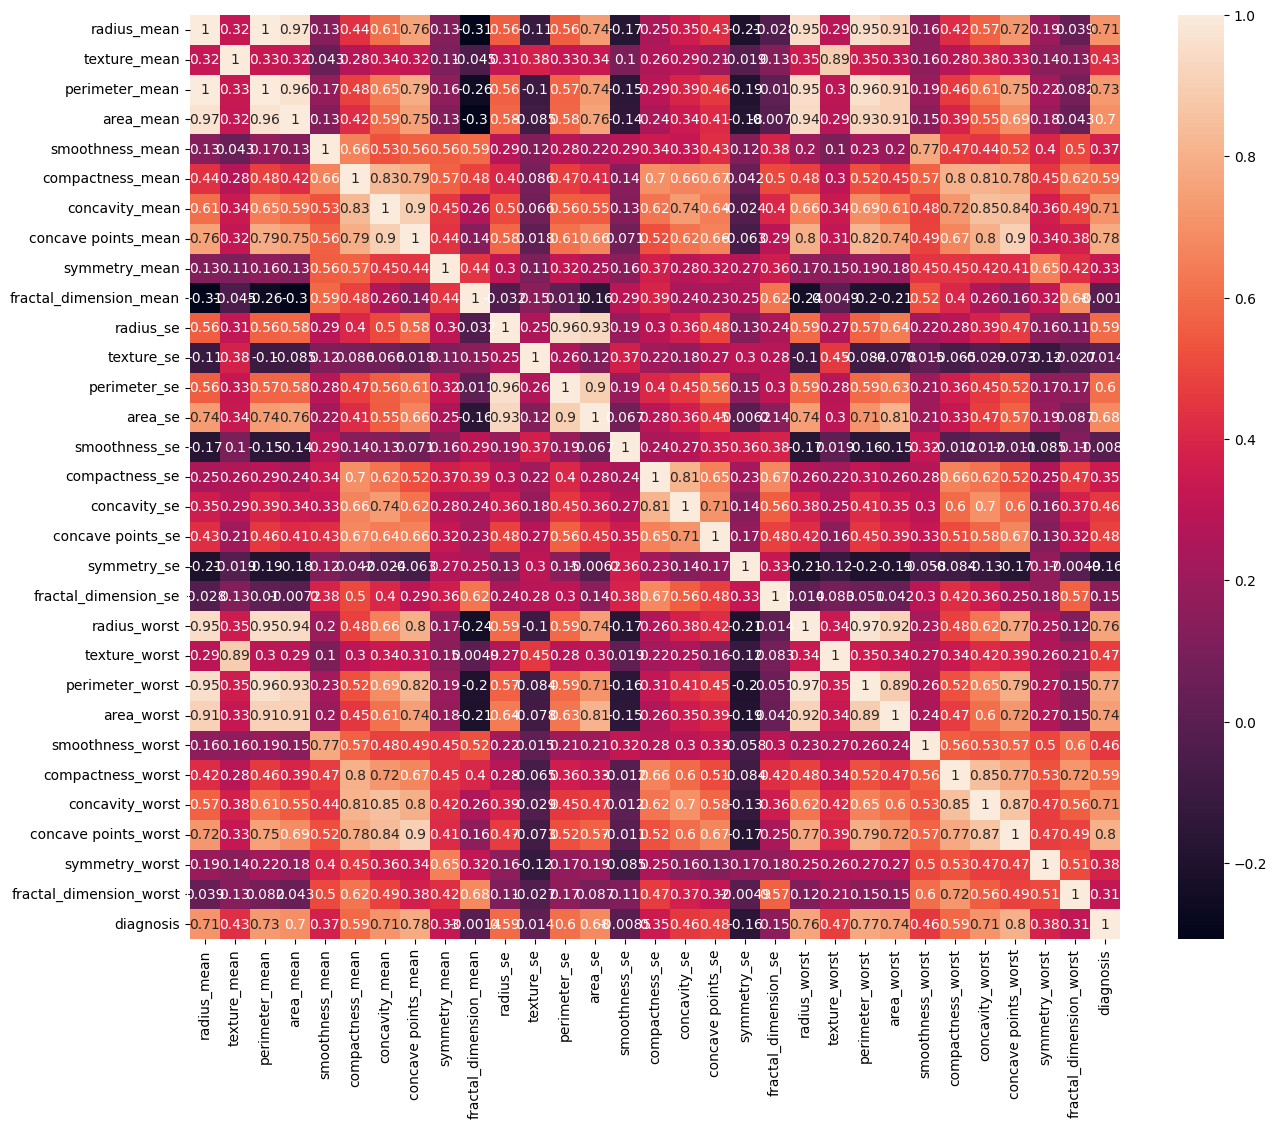

In [47]:
plt.figure(figsize=(15, 12))
sns.heatmap(fdf.corr(method='pearson'),annot=True)
plt.show()

In [48]:
fdf

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.105250,0.300100,0.147100,0.241900,0.078710,...,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.287488,0.118900,1
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,...,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,1
3,11.420000,20.380000,77.580000,386.100000,0.097485,0.105250,0.241400,0.105200,0.181341,0.061545,...,26.500000,98.870000,567.700000,0.134700,0.243350,0.686900,0.257500,0.287488,0.081252,1
6,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,...,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680,1
7,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,...,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,19.296920,22.795578,127.129100,1152.181006,0.105374,0.145055,0.208482,0.107770,0.186337,0.061687,...,33.205609,156.914899,1731.824004,0.165095,0.378428,0.584300,0.196393,0.326191,0.093723,1
706,21.415261,23.886597,143.763353,1371.048173,0.115726,0.236600,0.268904,0.153728,0.224926,0.069026,...,30.515121,173.685242,2083.995986,0.149788,0.641619,0.695076,0.260213,0.392911,0.111074,1
707,19.704830,23.937332,128.887230,1202.483043,0.105166,0.108478,0.174803,0.097495,0.167487,0.055198,...,29.813642,141.006693,1432.288415,0.155466,0.205851,0.423605,0.160360,0.243683,0.064771,1
708,15.562556,23.979098,104.205075,759.859018,0.112193,0.172708,0.192915,0.091492,0.201899,0.069727,...,33.313177,138.907145,1270.640977,0.175806,0.546181,0.689348,0.202947,0.361511,0.113222,1


In [49]:
# Features and target
X = fdf.drop("diagnosis", axis=1)
Y = fdf["diagnosis"]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [50]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train

array([[ 1.50530815, -0.28239262,  1.47193719, ...,  1.63891893,
         1.53462416, -0.32477748],
       [ 0.45218516,  1.17907446,  0.45291578, ..., -0.13235467,
        -0.09373348, -1.39577007],
       [ 1.06922624,  1.31331667,  0.95158583, ..., -0.10577775,
        -0.72964779, -0.20982428],
       ...,
       [ 1.78416325,  0.56105372,  1.84919193, ...,  2.31584874,
         0.0436277 ,  1.42665239],
       [-0.52974078, -0.75350679, -0.52057489, ..., -0.56680916,
         0.6276644 , -0.50256225],
       [-0.21232061,  1.36650697, -0.23828427, ...,  0.19594847,
         1.28442836, -0.24409604]])

In [52]:
X_test

array([[-0.12629084, -0.67752063, -0.18581551, ..., -0.9090261 ,
        -0.36477892, -0.38832304],
       [-0.7759639 , -0.97386665, -0.79029034, ..., -0.65232431,
        -0.18547194, -0.31121158],
       [-0.80859588, -1.63494621, -0.82021054, ..., -0.56086844,
        -0.17087718,  0.36708373],
       ...,
       [-1.35977968, -0.04430266, -1.35834057, ..., -1.16432088,
         0.71314796, -0.16627058],
       [-0.46744336, -0.65725766, -0.46593799, ..., -0.62402771,
         0.45252734,  0.22499871],
       [-0.99845467, -0.42423345, -0.97414782, ..., -0.34012366,
        -1.17791526,  0.02579409]])

In [53]:
# Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)
# Predictions and probabilities
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]
# Evaluation metrics
conf_matrix = confusion_matrix(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_prob)

conf_matrix, precision, recall, roc_auc


(array([[63,  0],
        [ 3, 55]], dtype=int64),
 1.0,
 0.9482758620689655,
 0.9937055281882868)

Confusion Matrix : (63 True Negatives, 54 True Positives, 0 False Positive, 2 False Negatives)

Precision: 1.0 (100%)

Recall: 0.96428 (96.42%)

ROC-AUC: 0.9985 (excellent performance)

In [72]:
num_features = X_train.shape[1]
print(num_features)

30


In [74]:
num_features = Y_train.shape
print(num_features)

(484,)


In [75]:
#SVM with linear and RBF kernel
# Train SVM (linear and RBF) for 2D data
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_linear.fit(X_train, Y_train)
svm_rbf.fit(X_train, Y_train)

SVC()

In [77]:
# Evaluate initial performance
print("Linear SVM accuracy:", svm_linear.score(X_test, Y_test))
print("RBF SVM accuracy:", svm_rbf.score(X_test, Y_test))

Linear SVM accuracy: 0.9504132231404959
RBF SVM accuracy: 0.9752066115702479


In [81]:
# Reduce to 2D
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Retrain on PCA components
svm_linear_2d = SVC(kernel='linear').fit(X_train_2d, Y_train)
svm_rbf_2d = SVC(kernel='rbf').fit(X_train_2d, Y_train)

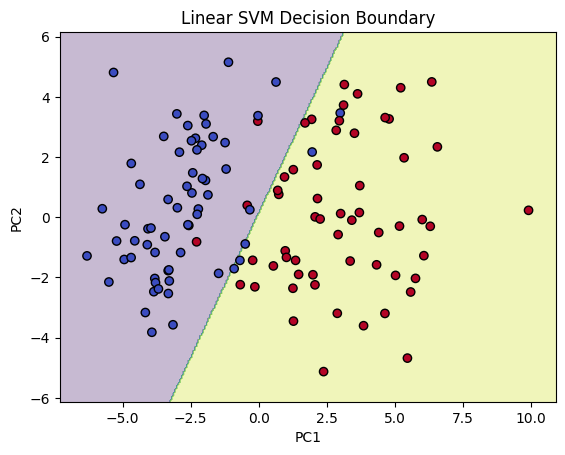

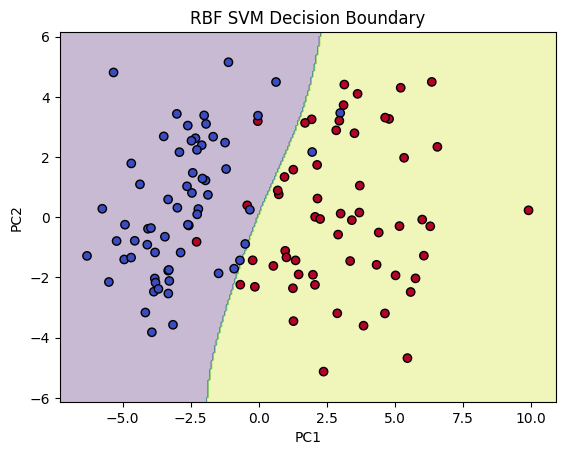

In [82]:
# Plotting helper
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

plot_decision_boundary(svm_linear_2d, X_test_2d, Y_test, 'Linear SVM Decision Boundary')
plot_decision_boundary(svm_rbf_2d, X_test_2d, Y_test, 'RBF SVM Decision Boundary')


In [83]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)
best_rbf = grid_search.best_estimator_
print("Tuned RBF SVM accuracy:", best_rbf.score(X_test, Y_test))

Best parameters: {'C': 10, 'gamma': 0.01}
Tuned RBF SVM accuracy: 0.9752066115702479


In [84]:
cv_scores = cross_val_score(best_rbf, X_train, Y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.97938144 0.98969072 0.96907216 0.96907216 1.        ]
Average CV accuracy: 0.9814432989690722


In [ ]:
# Tune threshold
# threshold = 0.4
# y_pred_adj = (y_prob >= threshold).astype(int)
# conf_matrix_adj = confusion_matrix(Y_test, y_pred_adj)
# precision_adj = precision_score(Y_test, y_pred_adj)
# recall_adj = recall_score(Y_test, y_pred_adj)

# # ROC Curve
# fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# (conf_matrix, precision, recall, roc_auc,
#  conf_matrix_adj, precision_adj, recall_adj,
#  fpr, tpr)

In [85]:
new_data = pd.DataFrame([{
    'mean_radius': 15.0,
    'mean_texture': 18.0,
    'mean_perimeter': 100.0,
    'mean_area': 700.0,
    'mean_smoothness': 0.10,
    'mean_compactness': 0.15,
    'mean_concavity': 0.05,
    'mean_concave_points': 0.02,
    'mean_symmetry': 0.20,
    'mean_fractal_dimension': 0.06,
    'radius_error': 0.50,
    'texture_error': 1.00,
    'perimeter_error': 3.50,
    'area_error': 40.0,
    'smoothness_error': 0.005,
    'compactness_error': 0.02,
    'concavity_error': 0.01,
    'concave_points_error': 0.005,
    'symmetry_error': 0.02,
    'fractal_dimension_error': 0.003,
    'worst_radius': 17.0,
    'worst_texture': 20.0,
    'worst_perimeter': 120.0,
    'worst_area': 900.0,
    'worst_smoothness': 0.12,
    'worst_compactness': 0.25,
    'worst_concavity': 0.10,
    'worst_concave_points': 0.05,
    'worst_symmetry': 0.30,
    'worst_fractal_dimension': 0.08
}])
prediction = lr.predict(new_data)
#(M=1, B=0)
print("\nPrediction for new passenger:", "Malignant(M)" if prediction[0] == 1 else "Benign(B)")


Prediction for new passenger: Malignant(M)


C:\Users\Thaibathul Munavara\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
